In [1]:
#信用卡欺诈分类器
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
#读取信用卡数据
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Text(0,0.5,'Frequency')

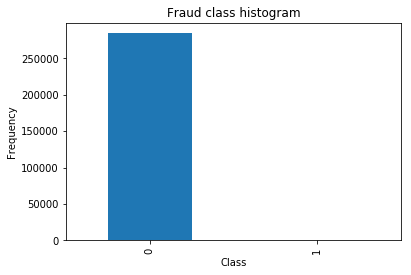

In [4]:
#绘制class（种类）的柱状分布图
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

#正负样本量非常不均衡，非欺诈较多，欺诈较少，因此需要采样

In [5]:
from sklearn.preprocessing import StandardScaler

#标准化数据，去除时间特征
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [6]:

#把数据特征分为输入X，和输出Y
x = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

# 实现下采样方法，运用np数据结构实现，这里给出的代码比较详细，也可使用sklearn中的数据处理的函数进行处理
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])  #欺诈样本的数量
fraud_indices = np.array(data[data.Class == 1].index)  #欺诈样本的索引

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index   #非欺诈样本的索引

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
# 対欺诈样本实行随机抽样  抽样量与负样本相同

#从非欺诈样本中随机抽取与欺诈样本量的索引的索引数，注意这里是replace = false是无放回采样
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices  将欺诈样本与非欺诈样本的索引结合起来
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset  根据索引选择下采样的样本
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# 查看下采样后的正负样本数量
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


In [30]:
#把数据特征分为输入X，和输出Y
X = data.ix[:, data.columns != 'Class']
y = data.ix[:, data.columns == 'Class']

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
#使用已有的包进行下采样

from imblearn.under_sampling import RandomUnderSampler 

# 建立RandomUnderSampler模型对象
model_RandomUnderSampler = RandomUnderSampler() 
# 输入数据并作下采样
x_RandomUnderSampler_resampled, y_RandomUnderSampler_resampled =model_RandomUnderSampler.fit_sample(x,y) 
count_class = pd.value_counts(y_RandomUnderSampler_resampled.ravel() , sort = True).sort_index()
count_class.plot(kind = 'bar')
plt.title("Fraud Class Histogram")
plt.xlabel("Class")
plt.ylabel("Count")
#如图 实现正负样本量均衡

ModuleNotFoundError: No module named 'imblearn'

In [33]:
from sklearn.cross_validation import train_test_split

# 分割训练集、测试集的输入和输出，测试集占比0.3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset  下采样数据集进行分割
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#选择Logistic回归模型
lr_model = LogisticRegression()

#设定参数网格
parameter_grid = {
                  'C': [0.01,0.1,1,10,100],
                  'penalty' : ('l1','l2')
                  }

#采用5折交叉验证 寻找最优参数
grid_search = GridSearchCV(lr_model,                     #模型参数
                           param_grid=parameter_grid,    #参数网格
                           cv=5,                         #交叉验证折数
                           scoring='recall'              #评判标准 recall
                          )
grid_search.fit(X_train_undersample, y_train_undersample.values.ravel())

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9680864509605663
Best parameters: {'C': 0.01, 'penalty': 'l1'}


In [39]:
#换一个评判标准？  accurancy
grid_search = GridSearchCV(lr_model,                     #模型参数
                           param_grid=parameter_grid,    #参数网格
                           cv=5
                          )
grid_search.fit(X_train_undersample, y_train_undersample.values.ravel())

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9462209302325582
Best parameters: {'C': 10}


In [12]:
from sklearn.metrics import confusion_matrix,recall_score,classification_report 
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.9387755102040817


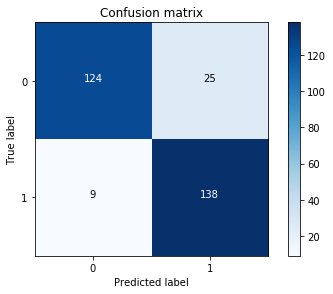

In [43]:
# 打印混淆矩阵
import itertools
best_c = 0.01
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the testing dataset:  0.9251700680272109


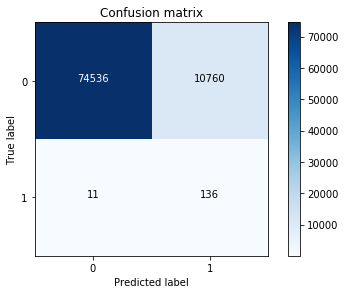

In [44]:
#没有采样的数据

lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.9863945578231292
Recall metric in the testing dataset:  0.9387755102040817
Recall metric in the testing dataset:  0.8979591836734694
Recall metric in the testing dataset:  0.8367346938775511
Recall metric in the testing dataset:  0.7687074829931972
Recall metric in the testing dataset:  0.5850340136054422


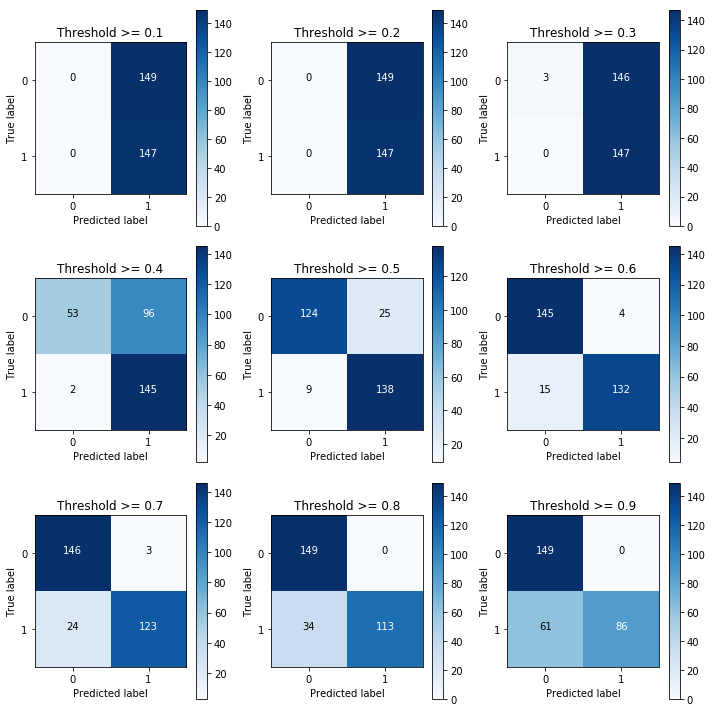

In [15]:
#阈值的选取

lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

In [16]:
#看一下上采样的效果

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [17]:
#读取数据
credit_cards=pd.read_csv('creditcard.csv')

columns=credit_cards.columns
# The labels are in the last column ('Class'). Simply remove it to obtain features columns
features_columns=columns.delete(len(columns)-1)

features=credit_cards[features_columns]
labels=credit_cards['Class']

Text(0,0.5,'Count')

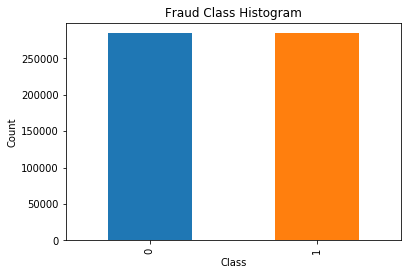

In [18]:
#上采样
oversampler=SMOTE(random_state=0)
os_features,os_labels=oversampler.fit_sample(features,labels)

count_class = pd.value_counts(os_labels , sort = True).sort_index()
count_class.plot(kind = 'bar')
plt.title("Fraud Class Histogram")
plt.xlabel("Class")
plt.ylabel("Count")

In [19]:
# Undersampled dataset  上采样数据集进行分割
os_features_train, os_features_test,os_labels_train, os_labels_test= train_test_split(os_features
                                                                                                   ,os_labels
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)

In [21]:
#采用5折交叉验证 寻找最优参数
lr = LogisticRegression( penalty = 'l1')


grid_search = GridSearchCV(lr,                     #模型参数
                           param_grid=parameter_grid,    #参数网格
                           cv=5,                         #交叉验证折数
                           scoring='recall'              #评判标准 recall
                          )
grid_search.fit(os_features_train, os_labels_train.flatten())

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


#时间比较长。。。

Best score: 0.9692807368625078
Best parameters: {'C': 10}


Recall metric in the testing dataset:  0.9691864617113689


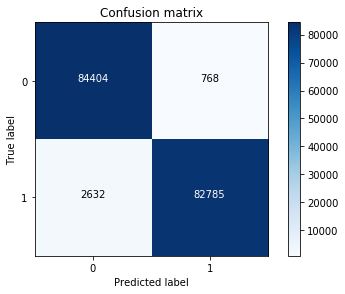

In [26]:
lr = LogisticRegression(C = 10 , penalty = 'l1')
lr.fit(os_features_train,os_labels_train.ravel())
y_pred = lr.predict(os_features_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(os_labels_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [27]:
#试一下 使用未采样的数据进行训练？？ 自行操作

In [28]:
#打印所有评估值
import sklearn.model_selection as sk_model_selection
df_1= np.array(X_train_undersample)
df_2= np.array(y_train_undersample)
#选择Logistic回归模型
lr_model = LogisticRegression(C= 0.1 , penalty = 'l1')
#打印AUC、召回率、准确率、精确率、F1值等
estimate_index = ['roc_auc','recall',None,'precision','f1']
for index in estimate_index:
    ix = sk_model_selection.cross_val_score(lr_model, X_train_undersample, y=y_train_undersample.values.flatten(), scoring=index, cv=5)
    print(str(index) + ":   "+ str(np.mean(ix)))


roc_auc:   0.9775936839764261
recall:   0.8956521739130435
None:   0.9375647942452131
precision:   0.9776046176046176
f1:   0.9346157265373911


第1次训练
accuracy:0.9202898550724637
约登指数: 0.4697288061267537
***************

第2次训练
accuracy:0.9130434782608695
约登指数: 0.6077710651677877
***************

第3次训练
accuracy:0.9710144927536232
约登指数: 0.5005437974079772
***************

第4次训练
accuracy:0.9708029197080292
约登指数: 0.9252641696560939
***************

第5次训练
accuracy:0.9562043795620438
约登指数: 0.42447101982234087
***************



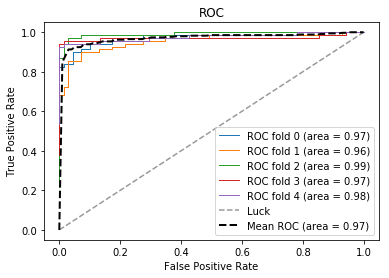

In [29]:
import sklearn.model_selection as sk_model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp

df_1= np.array(X_train_undersample)
df_2= np.array(y_train_undersample)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
i=0
adjustthresholds = 0
yuedeng = 0


#选择Logistic回归模型
lr_model = LogisticRegression(C= 0.1 , penalty = 'l1')

# 画ROC曲线
for train, test in StratifiedKFold(n_splits=5).split(df_1, df_2):
    print('第'+str(i+1)+'次训练')
    # 通过训练数据，使用svm线性核建立模型，并对测试集进行测试，求出预测得分
    probas = lr.fit(df_1[train], df_2[train].flatten()).predict_proba(df_1[test])

    result = {"probas": probas[:, 1], "fact":df_2[test] }

    result={'probas' : list(result['probas']),'fact' : list(result['fact'])}
    result = pd.DataFrame(result)
    result['pred'] = result.probas.apply(lambda x: 1 if x>=0.5 else 0)
    accuracy = (result[result['pred']==result['fact']].shape[0])/(result.shape[0])
    
    print('accuracy:'+str(accuracy))


    # 通过roc_curve()函数，求出fpr和tpr，以及阈值
    fpr, tpr, thresholds = roc_curve(df_2[test], probas[:, 1])

    # 约登指数是正阳减假阳最大的阈值
    print('约登指数: '+ str(np.min(thresholds[np.argwhere((tpr - fpr) == max(tpr-fpr))])))

    yuedeng += np.min(thresholds[np.argwhere((tpr - fpr) == max(tpr-fpr))])
    #adjustthresholds += max(thresholds[np.argwhere(tpr >0.90)])
    print("***************")
    print("")
    mean_tpr += interp(mean_fpr, fpr, tpr)  # 对mean_tpr在mean_fpr处进行插值，通过scipy包调用interp()函数
    mean_tpr[0] = 0.0  # 初始处为0
    roc_auc = auc(fpr, tpr)
    # 画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数能计算出来
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    i = i+1

# print("yuedeng"+str(gedeng/5))
# print("adjust"+str(adjustthresholds/5))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')


mean_tpr /= 5 # 在mean_fpr100个点，每个点处插值插值多次取平均
mean_tpr[-1] = 1.0  # 坐标最后一个点为（1,1）
mean_auc = auc(mean_fpr, mean_tpr)  # 计算平均AUC值
# 画平均ROC曲线
# print mean_fpr,len(mean_fpr)
# print mean_tpr
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()